# Basic SWB version 2.0 run - INPUT DATA SETS AND GRIDS

*updated February 2026*

## Introduction

For the comparison presented in the appendices to this report, SWB 2.0 model input was generated by resampling the polygon-based model input used for the Hawai‘i Water Budget code in Johnson and others (2014) onto a 10-m grid. For both models, the monthly rainfall time series used is 1978–2007 and the land cover is representative of 2010. The final model resolution of 75-m grid size was determined after running SWB 2.0 using multiple other resolutions, both finer and coarser, and evaluating both (1) the differences in output between Johnson and others (2014) and SWB 2.0, and (2) the computational effort. A finer SWB 2.0 grid sizes produces smaller differences in output between the two models, but at the cost of longer model execution times and larger input/output file sizes. Using a 75-m grid, SWB 2.0 produced a potential-recharge estimate of 1301 Mgal/d for the Island of Maui, which is 2.8 percent less than the estimate published in Johnson and others (2014); this result was achieved with a reasonable model-run time (several hours).

The files in this example case have been simplified so that a complete, working SWB version 2.0 application may be presented. The results will not be comparable to those published in Johnson and others (2014), nor are the inputs necessarily identical.

The control file associated with this example has grid cell sizes of 250 m specified. This is probably too coarse for many purposes, but it makes a nice example because a two-year simulation for Maui at this resolution runs to completion within 5 minutes.

## Preliminaries


In [1]:
import os
import numpy as np
import pandas as pd
from osgeo import gdal

from plot_and_table_functions import ( read_raster,
                                       make_plot,
                                       make_scatter,
                                       discrete_cmap,
                                       discrete_irreg_cmap,
                                       discrete_random_cmap )

#%run ../../COMMON/plot_and_table_functions.py

# lookup table path and filenames
lu_lookup_fname  = '../std_input/Landuse_lookup_maui.txt'

# grid files
lu_gridfile_fname              = '../input/LU2010_w_2_season_sugarcane__simulation_1__50m.asc'
soils_gridfile_fname           = '../input/maui_HYDROLOGIC_SOILS_GROUP__50m.asc'
soil_storage_gridfile_fname    = '../input/maui_SOIL_MOISTURE_STORAGE__50m.asc'

control_file     = '../maui_swb2.ctl'

## Read grids and tables

In [2]:
# open table files
lu_lookup     = pd.read_table( lu_lookup_fname )

In [3]:
# read in grid values - using 'read_raster' function taken from Andy Leaf's
# GISio.py package: https://github.com/aleaf/GIS_utils
lu_data, ly_gt, lu_proj, lu_xy                = read_raster( lu_gridfile_fname )
soils_data, soils_gt, soils_proj, soils_xy    = read_raster( soils_gridfile_fname )
ss_data, ss_gt, ss_proj, ss_xy                = read_raster( soil_storage_gridfile_fname )

c:\Users\smwesten\.local\share\mamba\envs\py312\Lib\site-packages\osgeo\gdal.py:606: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(



reading in ../input/LU2010_w_2_season_sugarcane__simulation_1__50m.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ../input/maui_HYDROLOGIC_SOILS_GROUP__50m.asc into numpy array...
creating a grid of xy coordinates in the original projection...

reading in ../input/maui_SOIL_MOISTURE_STORAGE__50m.asc into numpy array...
creating a grid of xy coordinates in the original projection...


## Make plots of input datasets

### Hydrologic soils group (not really used in this example)

The hydrologic soils group information is needed in order to make use of the SCS curve number methodology. This data is present, but not really used, because this example bases runoff estimates on a set of monthly runoff coefficients that partition a fraction of the rainfall received each day to runoff.

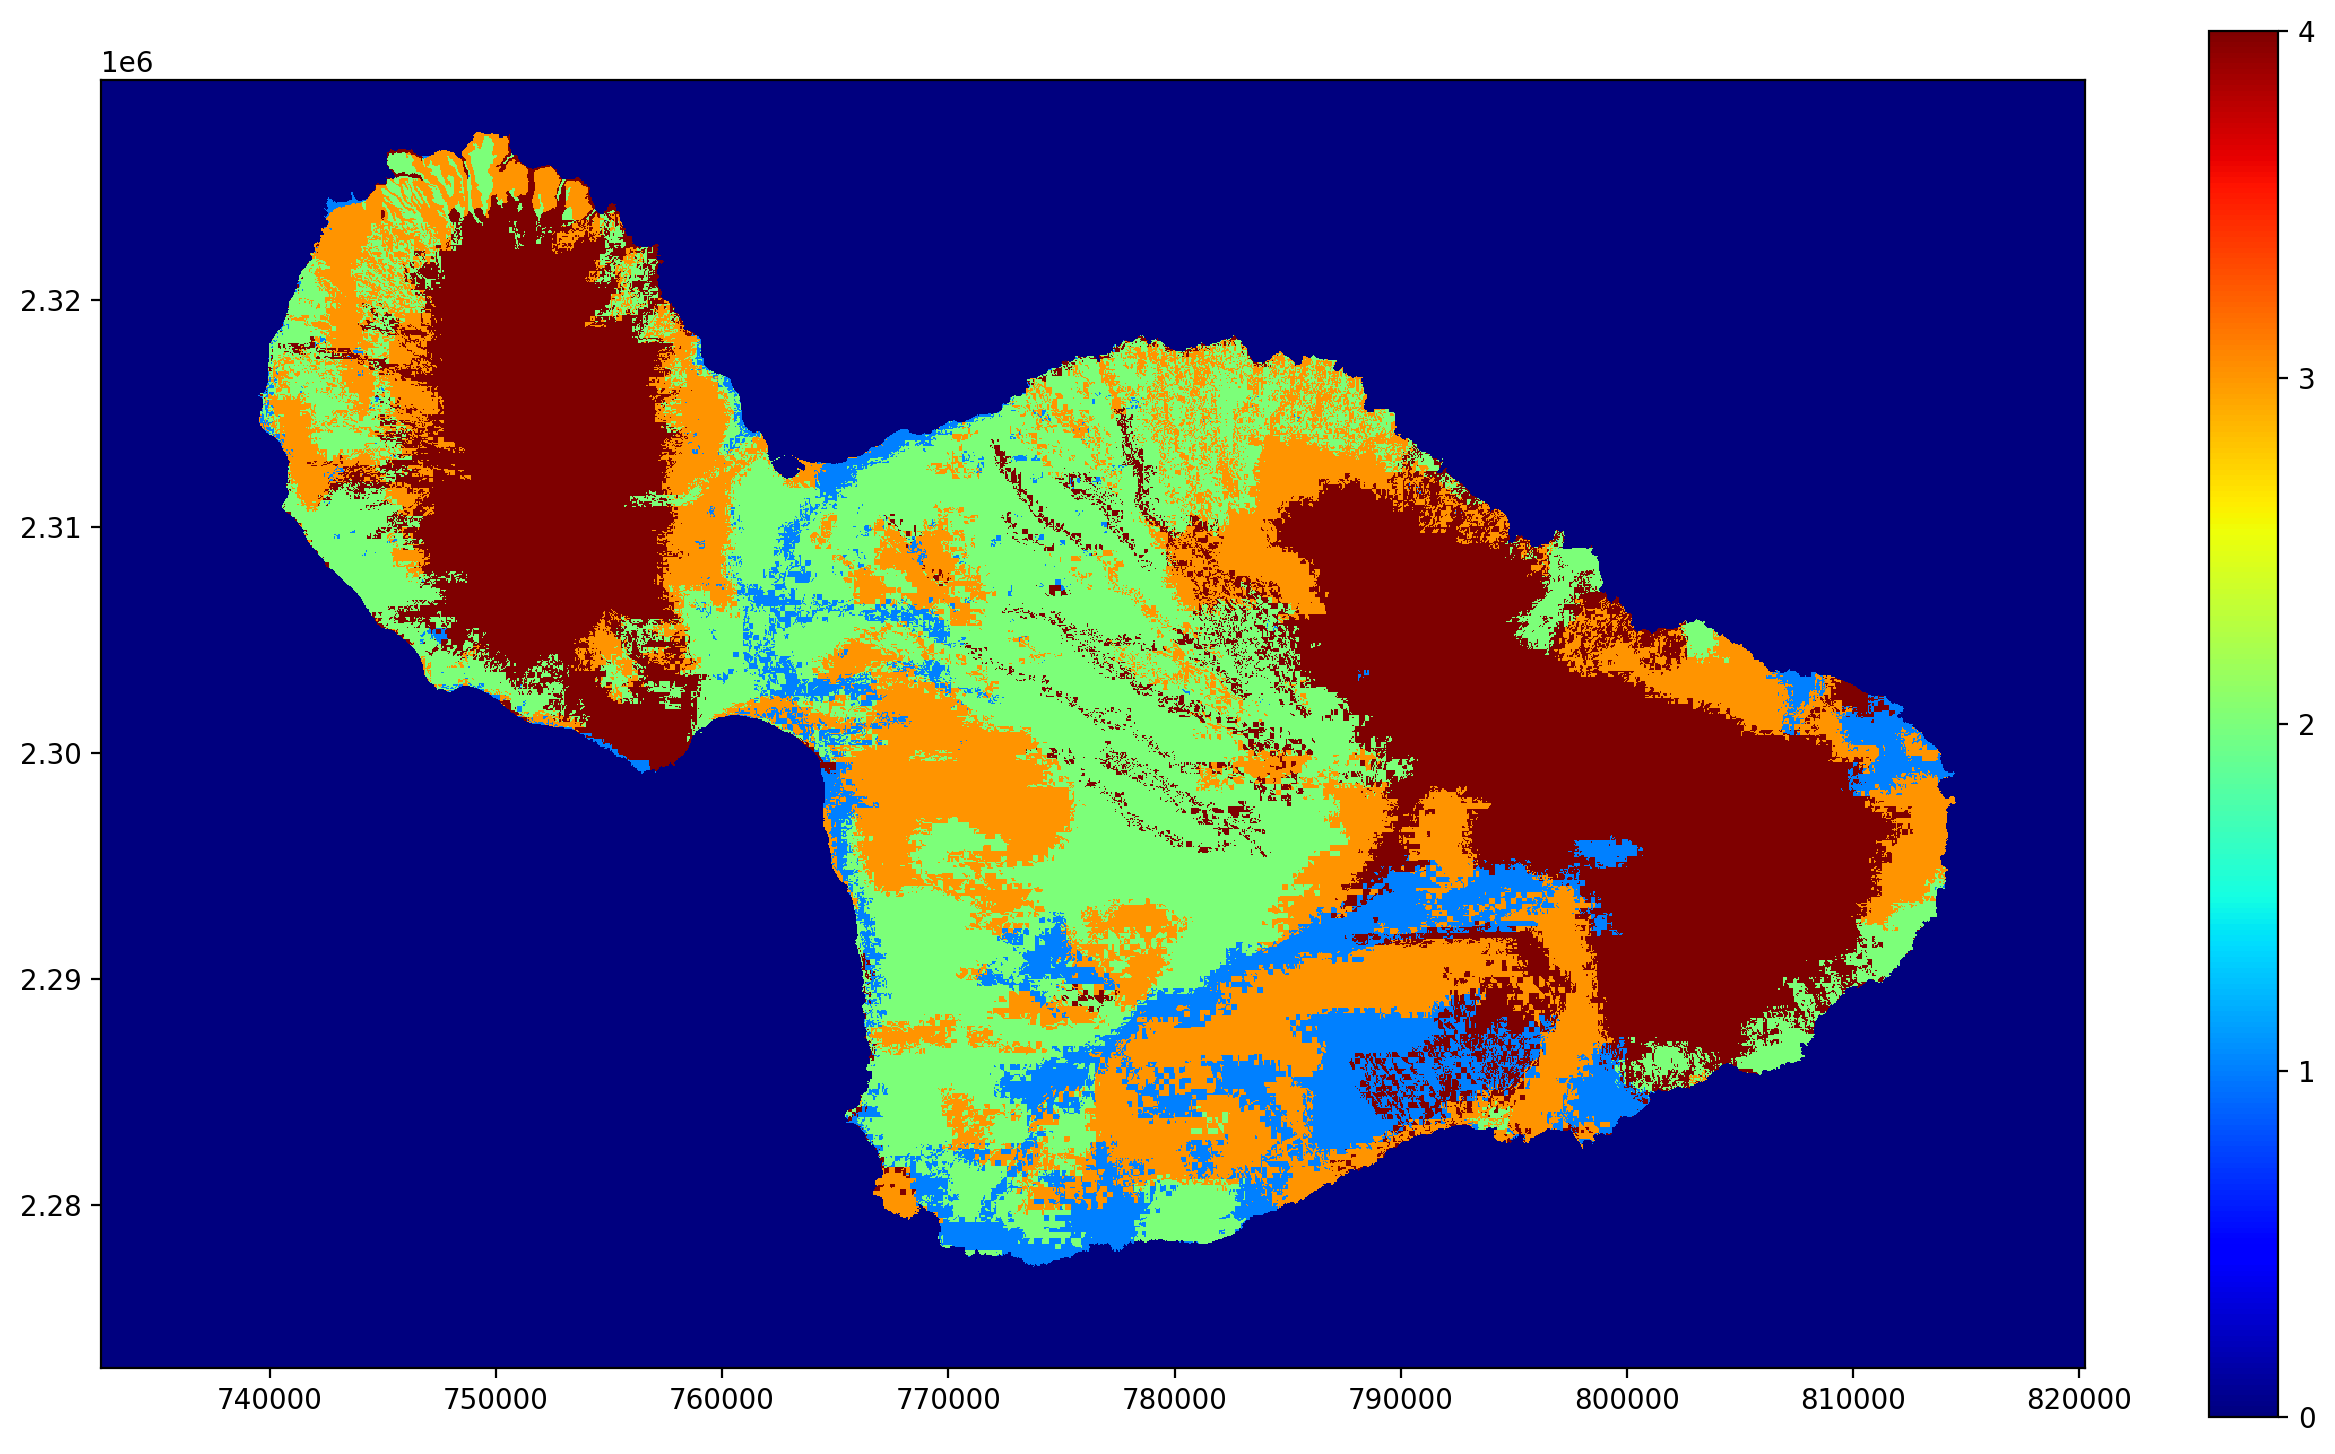

In [4]:
make_plot( x=soils_xy[0], y=soils_xy[1], var=soils_data, discrete=True )

### Landuse

Landuse in this example has sugar cane represented by landuse codes 41 and 42 (grey tones in figure below). Although beyond the scope of this example, these landuses were used to represent staggered growth and cropping patterns for sugarcane, which is grown and harvested over a 2-year cycle.

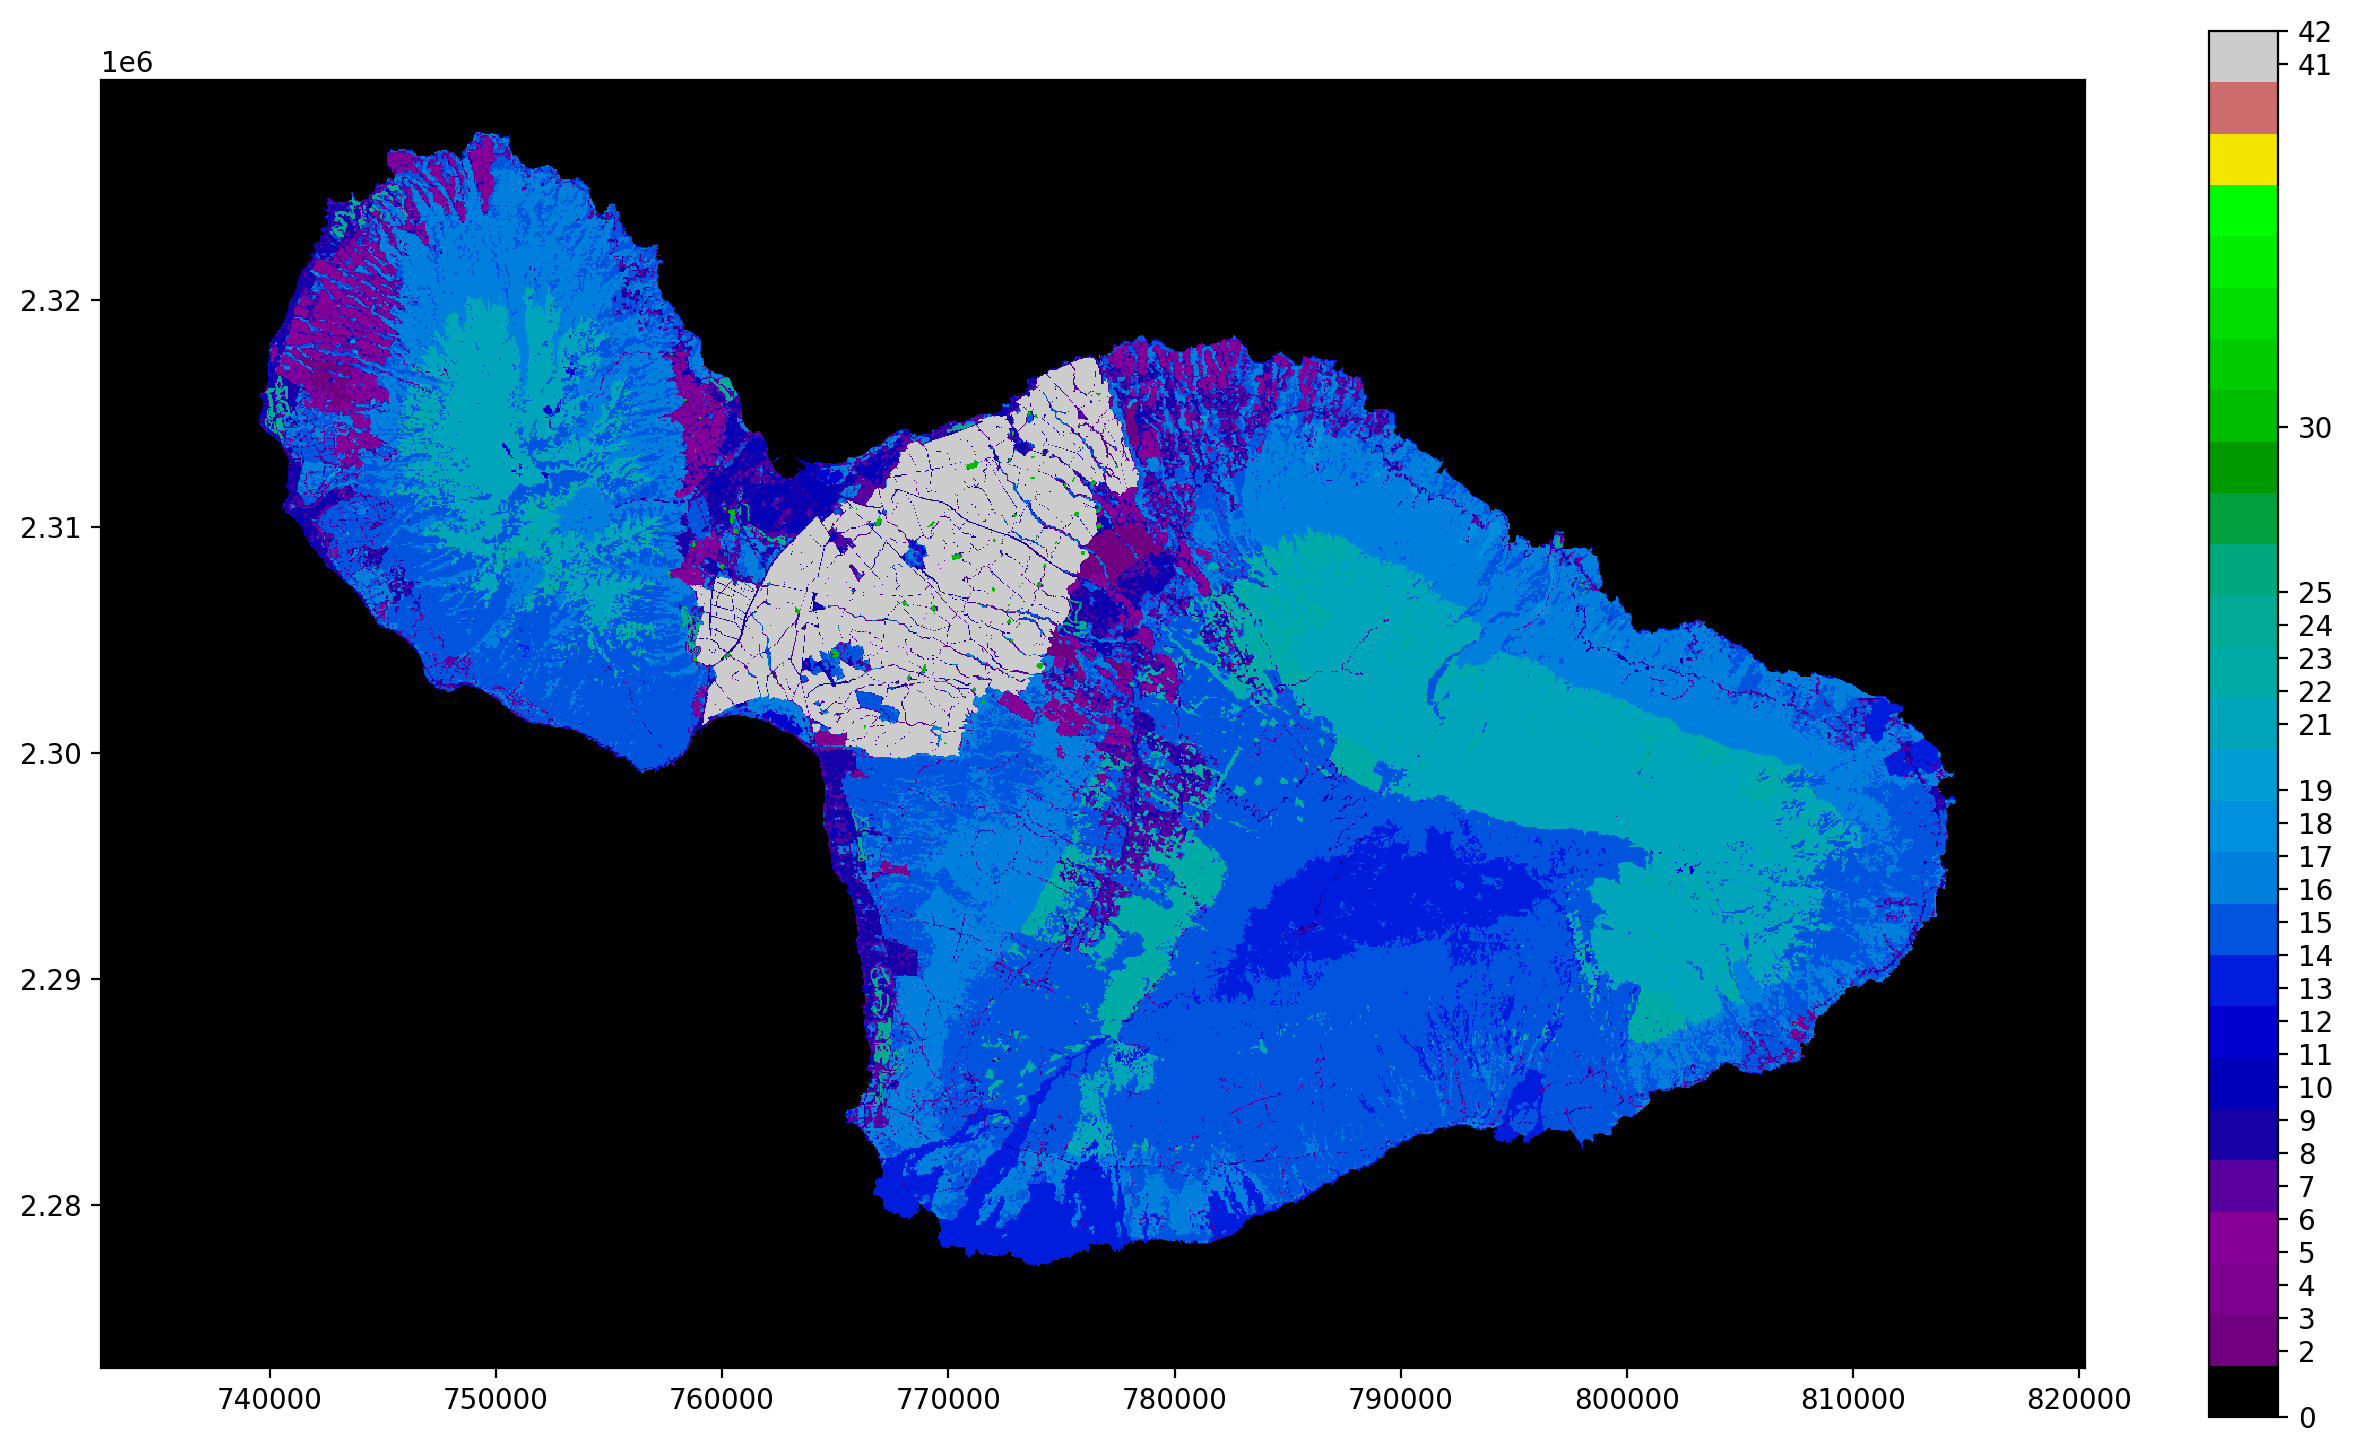

In [6]:
lu_cmap = discrete_irreg_cmap(discrete_vals=np.unique( lu_data.flatten()), base_cmap='nipy_spectral')
make_plot( x=lu_xy[0], y=lu_xy[1], var=lu_data, discrete=True, cmap=lu_cmap )

### Maximum Soil Storage

This example demonstrates an alternative way to specify the size of the soil moisture reservoir. SWB has typically used an available water capacity grid (AWC, in inches per foot) along with a set of rooting depths from a lookup table (for one or more soil types) in order to arrive at the maximum size of the soil moisture reservoir (AWC * rooting depth).

This set of inputs features a maximum soil moisture storage grid calculated external to SWB. In this way, neither the available water capacity grid nor the plant rooting depths are used to parameterize the size of the soil moisture reservoir.

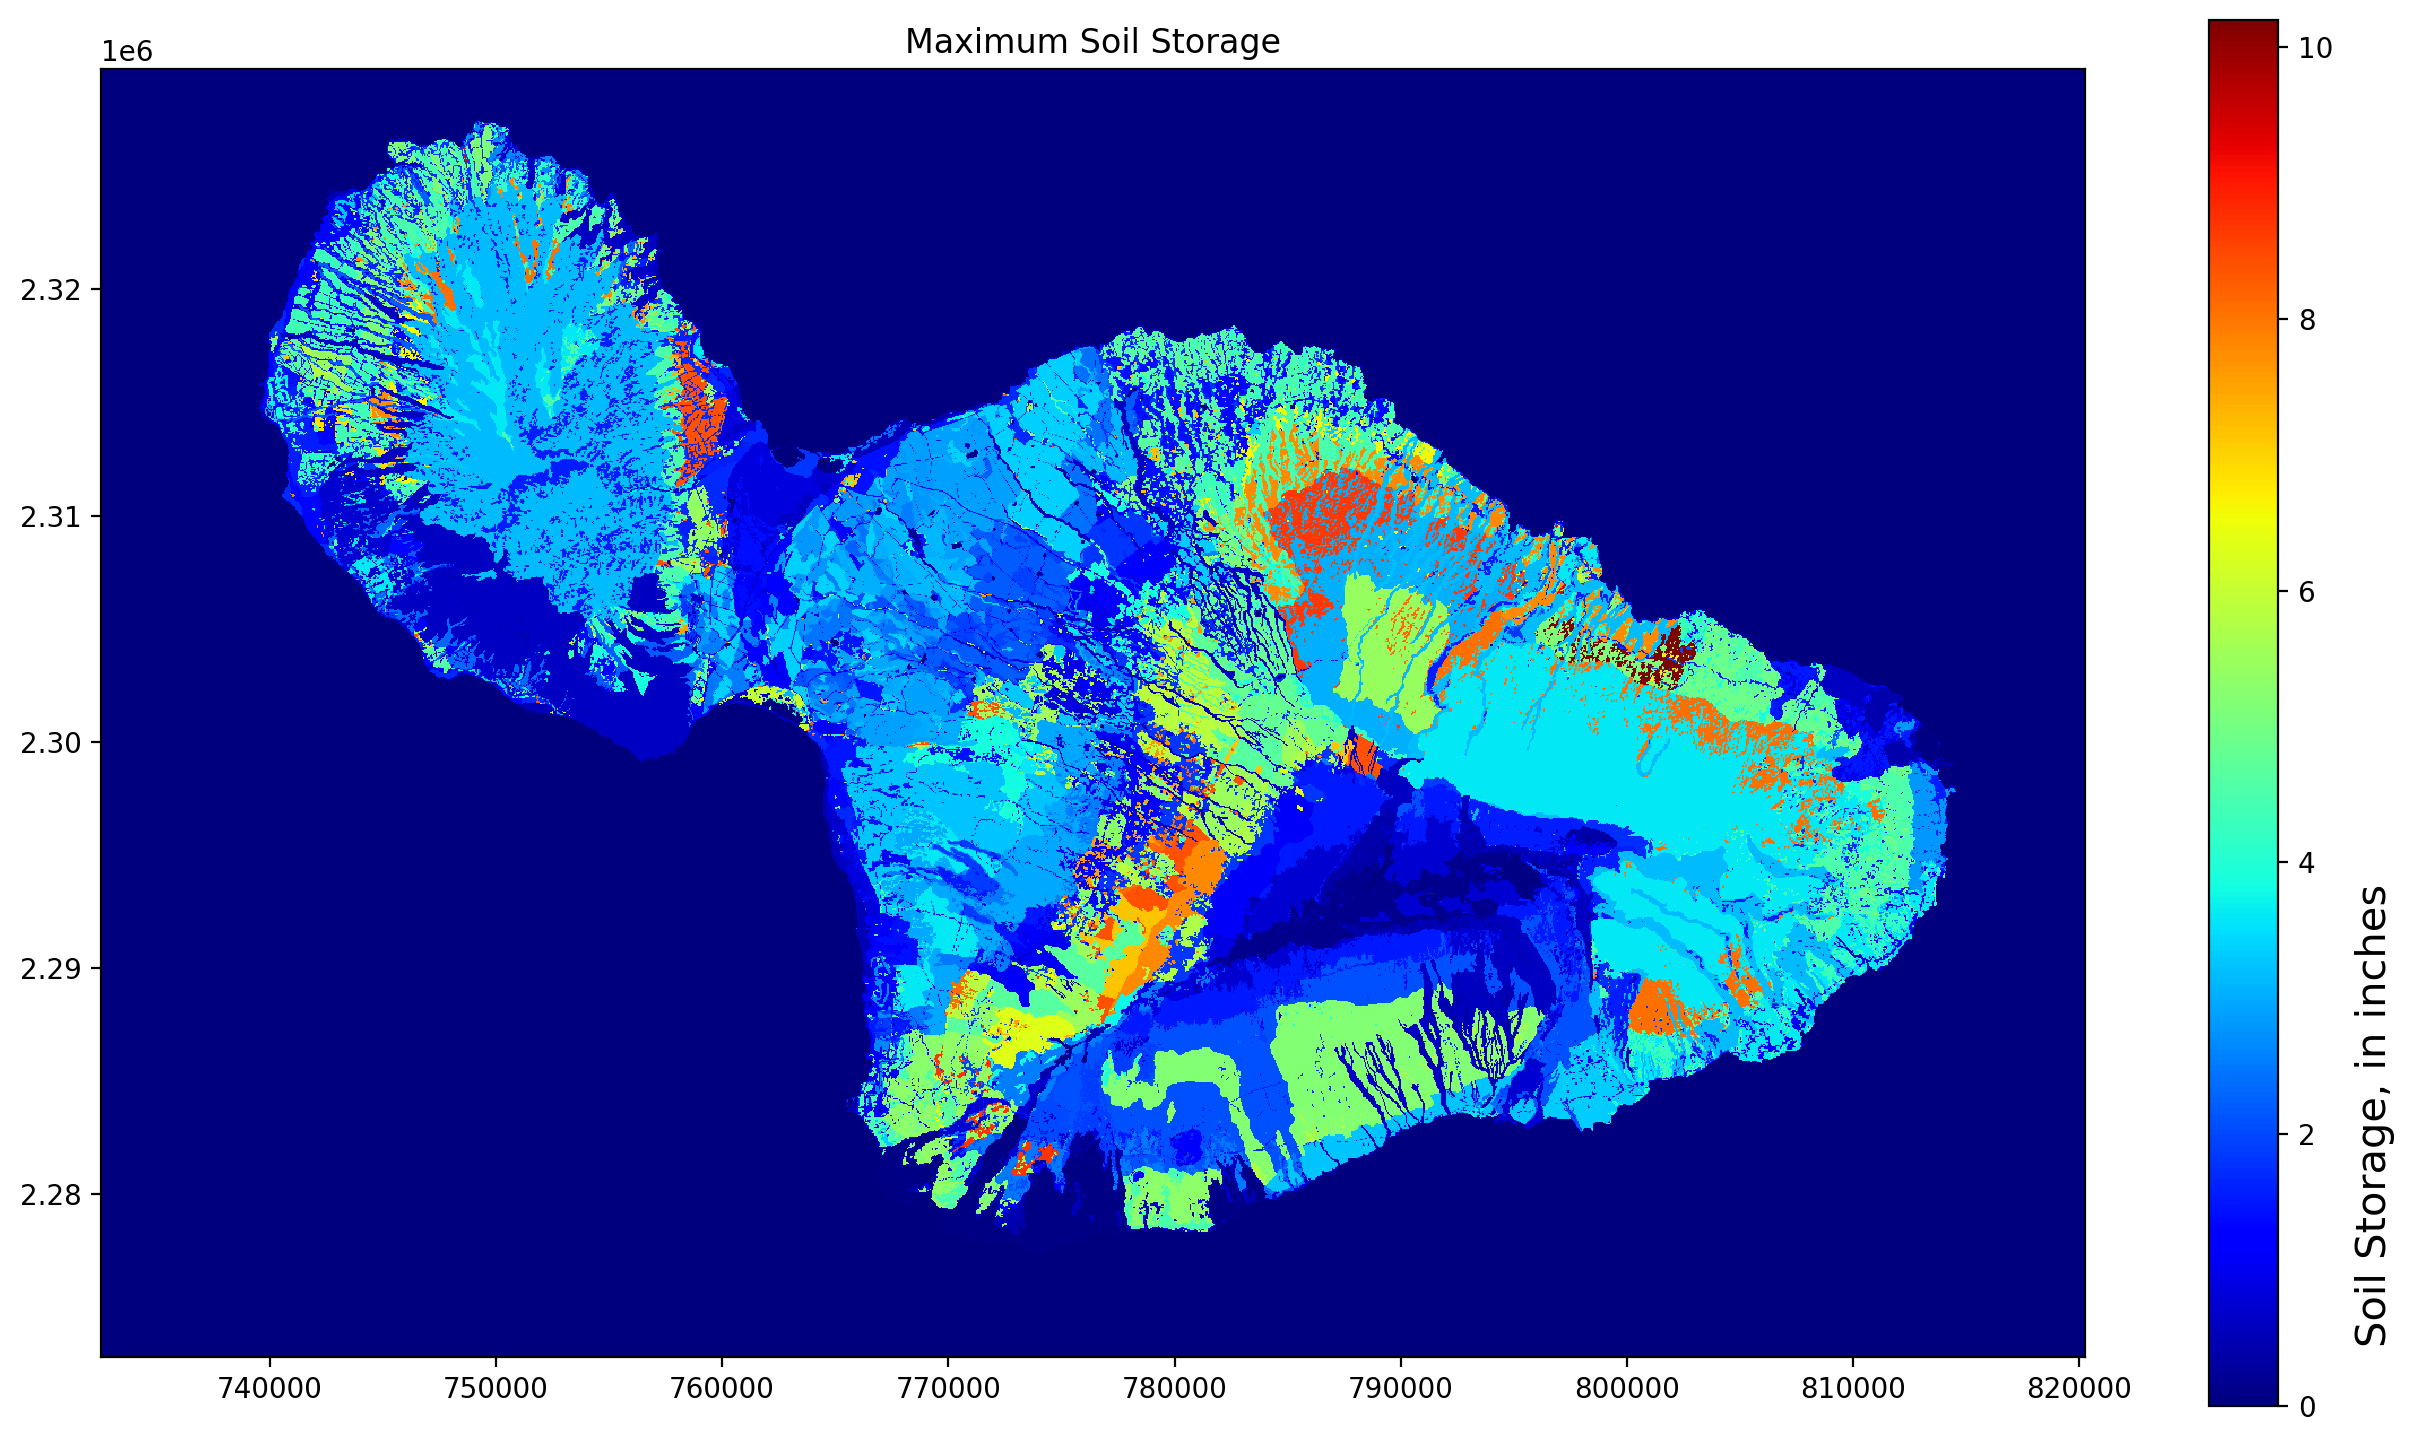

In [7]:
make_plot( x=ss_xy[0], y=ss_xy[1], var=ss_data, title='Maximum Soil Storage',
         barlabel='Soil Storage, in inches')

## References

Johnson, A.G., Engott, J.A., and Bassiouni, M., 2014, Spatially distributed groundwater recharge estimated using a water-budget model for the Island of Maui, Hawai ‘i, 1978-2007: US Geological Survey, accessed July 22, 2015, at https://pubs.er.usgs.gov/publication/sir20145168.

